<a href="https://colab.research.google.com/github/petitmeau/SLURP-optimization/blob/main/final_SLURP_best_predictors_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Importing necessary modules: the usual suspects!
%matplotlib inline
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import numpy as np
import pandas as pd
import pydotplus


import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing, tree
import statsmodels

from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

#import fancyimpute
import missingno as mn

import io
import urllib.request as req
import zipfile

import warnings
warnings.filterwarnings("ignore")

# Import and process the data

In [ ]:
#Import data
df1 = pd.read_excel('/content/drive/MyDrive/SLURP/LU_only_Working Slurp mistakes.xlsx')
df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cases,Diagnosis on patterns,6 regions,10 regions,Surfactant,GA,R1,R2,R3,R4,R5,L1,L2,L3,L4,L5
2,1,RDS,10,19,1,29,2,2,2,2,2,1,1,2,2,3
3,2,RDS,na,na,1,28,1,2,1,2,2,NaN,NaN,NaN,2,2
4,3,RDS,12,22,1,26,2,2,2,2,2,2,2,2,3,3


In [ ]:
#Import data
df2 = pd.read_excel('/content/drive/MyDrive/SLURP/ExtendedLU_only_Working Slurp mistakes.xlsx', sheet_name ='external validation cohort')
df2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cases,6 regions,10 regions,Surfactant,GA,R1,R2,R3,R4,R5,L1,L2,L3,L4,L5
2,88,2,6,0,28,0,0,0,1,1,2,0,0,1,1
3,89,3,5,0,32,0,0.5,1,1.5,2,1,1,0,1,1.5
4,90,1,5,0,34.8,0,0,0,2,1,0,1,0,1,0


In [ ]:
# Remove unnecessary first row
df1 = df1.iloc[1:]
df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
1,Cases,Diagnosis on patterns,6 regions,10 regions,Surfactant,GA,R1,R2,R3,R4,R5,L1,L2,L3,L4,L5
2,1,RDS,10,19,1,29,2,2,2,2,2,1,1,2,2,3
3,2,RDS,na,na,1,28,1,2,1,2,2,NaN,NaN,NaN,2,2
4,3,RDS,12,22,1,26,2,2,2,2,2,2,2,2,3,3
5,4,TTN,6,7,0,33,1,1,1,0,0,1,1,1,1,0


In [ ]:
# Remove unnecessary first row
df2 = df2.iloc[1:]
df2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,Cases,6 regions,10 regions,Surfactant,GA,R1,R2,R3,R4,R5,L1,L2,L3,L4,L5
2,88,2,6,0,28,0,0,0,1,1,2,0,0,1,1
3,89,3,5,0,32,0,0.5,1,1.5,2,1,1,0,1,1.5
4,90,1,5,0,34.8,0,0,0,2,1,0,1,0,1,0
5,91,7,13.5,0,33.4,1,1,0.5,1.5,2,1,1.5,2,1,2


In [ ]:
# define first row as columns names
df1.columns = df1.iloc[0]
# Remove first row
df1 = df1.iloc[1:]
df1.head()

1,Cases,Diagnosis on patterns,6 regions,10 regions,Surfactant,GA,R1,R2,R3,R4,R5,L1,L2,L3,L4,L5
2,1,RDS,10,19,1,29,2,2,2,2,2,1,1,2,2,3
3,2,RDS,na,na,1,28,1,2,1,2,2,NaN,NaN,NaN,2,2
4,3,RDS,12,22,1,26,2,2,2,2,2,2,2,2,3,3
5,4,TTN,6,7,0,33,1,1,1,0,0,1,1,1,1,0
6,5,RDS,10,18,0,32,2,1,2,2,2,1,2,2,2,2


In [ ]:
# define first row as columns names
df2.columns = df2.iloc[0]
# Remove first row
df2 = df2.iloc[1:]
df2.head()

1,Cases,6 regions,10 regions,Surfactant,GA,R1,R2,R3,R4,R5,L1,L2,L3,L4,L5
2,88,2,6,0,28,0,0,0,1,1,2,0,0,1,1
3,89,3,5,0,32,0,0.5,1,1.5,2,1,1,0,1,1.5
4,90,1,5,0,34.8,0,0,0,2,1,0,1,0,1,0
5,91,7,13.5,0,33.4,1,1,0.5,1.5,2,1,1.5,2,1,2
6,92,2,2,0,34,0,1,0,0,0,0,1,0,0,0


In [ ]:
#remove rows with missing data
print(df1.shape)
df1 = df1[df1['6 regions'] != 'na']
df1.head()
print(df1.shape)

(86, 16)
(82, 16)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 2 to 87
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cases                  82 non-null     object
 1   Diagnosis on patterns  82 non-null     object
 2   6 regions              82 non-null     object
 3   10 regions             82 non-null     object
 4   Surfactant             80 non-null     object
 5   GA                     81 non-null     object
 6   R1                     80 non-null     object
 7   R2                     80 non-null     object
 8   R3                     79 non-null     object
 9   R4                     78 non-null     object
 10  R5                     78 non-null     object
 11  L1                     79 non-null     object
 12  L2                     80 non-null     object
 13  L3                     80 non-null     object
 14  L4                     78 non-null     object
 15  L5                     78 non-

In [ ]:
#remove rows with missing data
print(df2.shape)
df2 = df2[df2['6 regions'] != 'na']
df2.head()
print(df2.shape)

(998, 15)
(998, 15)


In [ ]:
df1 = df1.dropna()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 2 to 87
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cases                  77 non-null     object
 1   Diagnosis on patterns  77 non-null     object
 2   6 regions              77 non-null     object
 3   10 regions             77 non-null     object
 4   Surfactant             77 non-null     object
 5   GA                     77 non-null     object
 6   R1                     77 non-null     object
 7   R2                     77 non-null     object
 8   R3                     77 non-null     object
 9   R4                     77 non-null     object
 10  R5                     77 non-null     object
 11  L1                     77 non-null     object
 12  L2                     77 non-null     object
 13  L3                     77 non-null     object
 14  L4                     77 non-null     object
 15  L5                     77 non-

In [ ]:
# convert all features except Diagnosis on patterns into integer
columns_to_convert = ['6 regions', '10 regions', 'Surfactant', 'GA', 'R1', 'R2', 'R3', 'R4', 'R5', 'L1','L2', 'L3', 'L4','L5']
# Replace 'na' with NaN and then convert to numeric
df1[columns_to_convert] = df1[columns_to_convert].replace('na', np.nan).astype(float).astype(pd.Int64Dtype())
#using pd.Int64Dtype() to allow for integer with Nan without converting to float
df1.head()

1,Cases,Diagnosis on patterns,6 regions,10 regions,Surfactant,GA,R1,R2,R3,R4,R5,L1,L2,L3,L4,L5
2,1,RDS,10,19,1,29,2,2,2,2,2,1,1,2,2,3
4,3,RDS,12,22,1,26,2,2,2,2,2,2,2,2,3,3
5,4,TTN,6,7,0,33,1,1,1,0,0,1,1,1,1,0
6,5,RDS,10,18,0,32,2,1,2,2,2,1,2,2,2,2
7,6,TTN,1,1,0,31,0,1,0,0,0,0,0,0,0,0


In [ ]:
# convert all features except Diagnosis on patterns into integer
# columns_to_convert = [ '6 regions', '10 regions', 'Surfactant', 'GA', 'R1', 'R2', 'R3', 'R4', 'R5', 'L1','L2', 'L3', 'L4','L5']
# Replace 'na' with NaN and then convert to numeric
df2[columns_to_convert] = df2[columns_to_convert].replace('na', np.nan) #.astype(float).astype(pd.Int64Dtype())
#using pd.Int64Dtype() to allow for integer with Nan without converting to float
df2.head()

1,Cases,6 regions,10 regions,Surfactant,GA,R1,R2,R3,R4,R5,L1,L2,L3,L4,L5
2,88,2.0,6.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0
3,89,3.0,5.0,0.0,32.0,0.0,0.5,1.0,1.5,2.0,1.0,1.0,0.0,1.0,1.5
4,90,1.0,5.0,0.0,34.8,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0
5,91,7.0,13.5,0.0,33.4,1.0,1.0,0.5,1.5,2.0,1.0,1.5,2.0,1.0,2.0
6,92,2.0,2.0,0.0,34.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df1 = df1.dropna(subset=['6 regions', 'Surfactant', 'R1', 'R2', 'R3', 'R4', 'R5', 'L1', 'L2', 'L3', 'L4', 'L5'])
df2 = df2.dropna(subset=['6 regions', 'Surfactant', 'R1', 'R2', 'R3', 'R4', 'R5', 'L1', 'L2', 'L3', 'L4', 'L5'])

# Data analysis

In [ ]:
# description for categorical values
df1.describe(include='object')

1,Cases,Diagnosis on patterns
count,77,77
unique,77,3
top,1,RDS
freq,1,44


In [ ]:
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

In [ ]:
# description for integers values
df1.describe()

1,6 regions,10 regions,Surfactant,GA,R1,R2,R3,R4,R5,L1,L2,L3,L4,L5
count,77.0,76.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0
mean,7.428571,13.394737,0.376623,30.467532,1.103896,1.194805,1.402597,1.480519,1.480519,1.090909,1.246753,1.415584,1.480519,1.493506
std,3.43139,5.638153,0.487717,2.297507,0.680256,0.688992,0.693195,0.640937,0.718375,0.632077,0.710001,0.675719,0.640937,0.804974
min,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5.0,9.0,0.0,29.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,8.0,15.0,0.0,31.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0
75%,10.0,18.0,1.0,32.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
max,12.0,22.0,1.0,34.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0


In [ ]:
df2.describe()

1,6 regions,10 regions,Surfactant,GA,R1,R2,R3,R4,R5,L1,L2,L3,L4,L5
count,44.000000,43.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,6.875000,12.302326,0.409091,31.088636,1.102273,1.113636,1.170455,1.295455,1.318182,1.204545,1.136364,1.159091,1.318182,1.329545
std,4.517569,7.455534,0.497350,2.556634,0.937460,0.848142,0.848687,0.816389,0.909197,0.878147,0.787723,0.913546,0.800370,0.908251
min,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,28.750000,0.000000,0.375000,0.875000,1.000000,1.000000,0.750000,1.000000,0.000000,1.000000,1.000000
50%,7.000000,13.000000,0.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,11.000000,19.000000,1.000000,33.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,18.000000,30.000000,1.000000,34.800000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [ ]:
# capacity of pattern to predict surfactant: x axis is Diagnosis on pattern and y axis is % with surfactant = 1
df1.groupby('Diagnosis on patterns')['Surfactant'].value_counts(normalize=True)


Diagnosis on patterns  Surfactant
RDS                    1             0.568182
                       0             0.431818
TTN                    0             0.866667
                       1             0.133333
nd                     0                  1.0
Name: proportion, dtype: Float64

In [ ]:
# cross table: outcome is surfactant, variable is diagnosis on patterns
pd.crosstab(df1['Diagnosis on patterns'], df1['Surfactant'])

Surfactant,0,1
Diagnosis on patterns,,
RDS,19,25
TTN,26,4
nd,3,0


In [ ]:
# Create a new column '6_regions_group' based on the 6 regions score
df1['6_regions_group'] = pd.cut(df1['6 regions'], bins=[-float('inf'), 9, float('inf')],
                               labels=['<9', '>=9'])

# Create the cross-tabulation
cross_tab = pd.crosstab(df1['6_regions_group'], df1['Surfactant'])

# Display the cross-tabulation
print(cross_tab)

Surfactant        0   1
6_regions_group        
<9               42  11
>=9               6  18


In [ ]:
# Create a new column '6_regions_group' based on the 6 regions score
df2['6_regions_group'] = pd.cut(df2['6 regions'], bins=[-float('inf'), 9, float('inf')],
                               labels=['<9', '>=9'])

# Create the cross-tabulation
cross_tab = pd.crosstab(df2['6_regions_group'], df2['Surfactant'])

# Display the cross-tabulation
print(cross_tab)

Surfactant       0.0  1.0
6_regions_group          
<9                25    5
>=9                1   13


On the 29 patients who received surfactant, 18 were scored properly and 11 were not properly scored

Looking at patients who were diagnosed as TTN and received surfactant, what was the score?

In [ ]:
# 6 regions score for those with TTN as Diagnosis on patterns and surfactant =1
filtered_df = df1[(df1['Diagnosis on patterns'] == 'TTN') & (df1['Surfactant'] == 1)]
six_regions_score = filtered_df['6 regions']
print(six_regions_score.value_counts())  # Get descriptive statistics

6 regions
5    1
4    1
3    1
6    1
Name: count, dtype: Int64


For the 4 patients diagnosed with TTN and who received surfactant, all 4 had a low score. This reflects limitation of LU that whatever the method would have concluded TTN and would not have recommended surfactant

In [ ]:
# how good is diagnosis on patterns to predict Surfactant
pd.crosstab(df1['Diagnosis on patterns'], df1['Surfactant']).apply(lambda r: r/r.sum(), axis=1)

Surfactant,0,1
Diagnosis on patterns,,
RDS,0.431818,0.568182
TTN,0.866667,0.133333
nd,1.000000,0.000000


In [ ]:
# accuracy of diagnosis on pattern to predict surfactant
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming your DataFrame is named df1

# Get the true labels for Surfactant
y_true = df1['Surfactant']

# Create a binary prediction based on Diagnosis on patterns = RDS
y_pred = (df1['Diagnosis on patterns'] == 'RDS').astype(int)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.86
Specificity: 0.60


In [ ]:
# accuracy of diagnosis on pattern to predict no surfactant
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming your DataFrame is named df1

# Get the true labels for Surfactant
y_true = (df1['Surfactant'] == 0).astype(int)

# Create a binary prediction based on Diagnosis on patterns = RDS
y_pred = (df1['Diagnosis on patterns'] == 'TTN').astype(int)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.54
Specificity: 0.86


As a conclusion, TTN diagnosis pattern is very specific to predict no surfactant, but RDS diagnosis pattern is not specific to predict surfactant administration

# Bivariate analysis

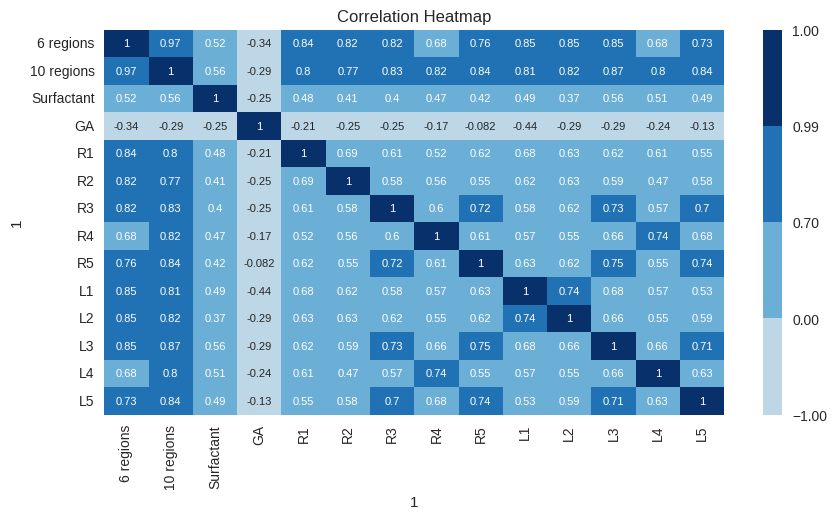

In [ ]:
import matplotlib.colors as mcolors

corr = df1.corr(numeric_only=True)

boundaries = [-1, 0, 0.7, 0.99, 1]

cmap = mcolors.ListedColormap(["#bdd7e7", "#6baed6", "#2171b5", "#08306b"])
norm = mcolors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.figure(figsize=(10, 5))
sns.heatmap(corr,
            annot=True,
            cmap=cmap,
            norm=norm,
            vmin=-1,
            vmax=1,
            annot_kws={'size': 8})
plt.title("Correlation Heatmap")
plt.show()


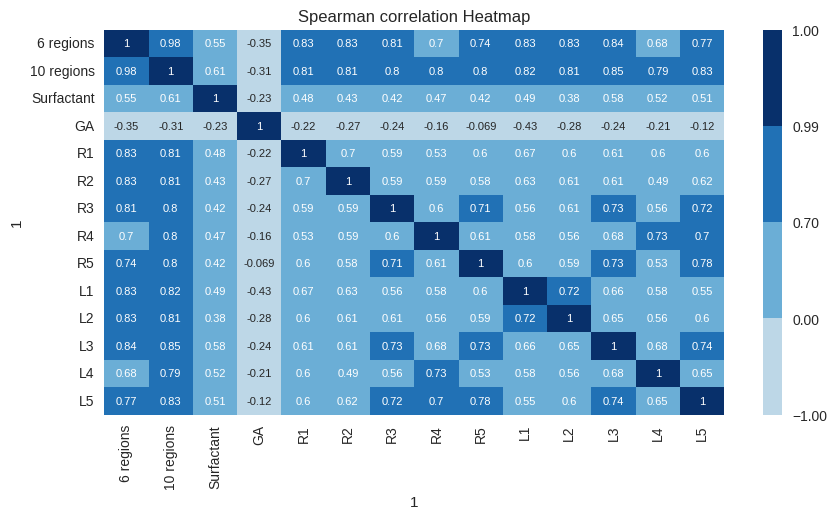

In [ ]:
import matplotlib.colors as mcolors

corr = df1.corr(method='spearman', numeric_only=True)

boundaries = [-1, 0, 0.7, 0.99, 1]

cmap = mcolors.ListedColormap(["#bdd7e7", "#6baed6", "#2171b5", "#08306b"])
norm = mcolors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.figure(figsize=(10, 5))
sns.heatmap(corr,
            annot=True,
            cmap=cmap,
            norm=norm,
            vmin=-1,
            vmax=1,
            annot_kws={'size': 8})
plt.title("Spearman correlation Heatmap")
plt.show()


# Exploring regional score for surfactant prediction

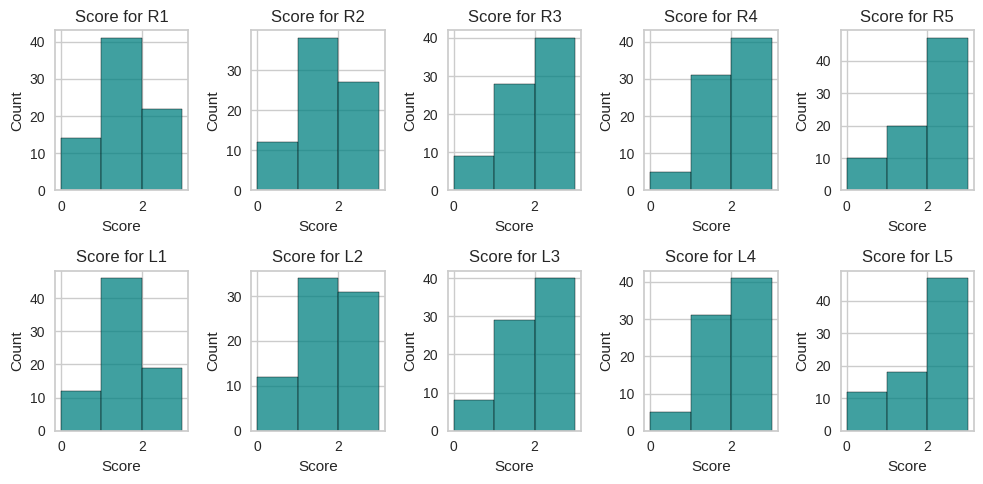

In [ ]:
# look into each region
fig, plt.axes = plt.subplots(nrows=2, ncols=5, figsize=(10,5))

for i, region in enumerate(['R1', 'R2', 'R3', 'R4', 'R5', 'L1', 'L2', 'L3', 'L4', 'L5']):
  plt.subplot(2,5,i+1)
  bins = np.arange(0,4,1)
  sns.histplot(df1[region], bins = bins, color = 'teal')
  plt.xlabel('Score')
  plt.ylabel('Count')
  plt.title('Score for {}'.format(region))
  plt.title('Score for {}'.format(region))


  # Adjust the spacing between subplots
  plt.tight_layout()

# Increase vertical spacing between rows
  plt.subplots_adjust(hspace=0.5)  # Adjust 0.5 to your preference

  # Display the figure
plt.show()


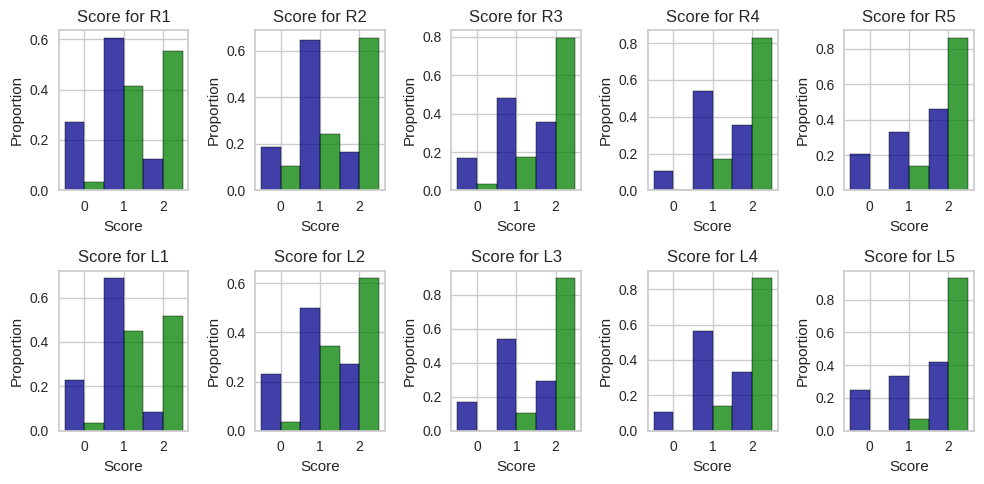

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

regions = ['R1', 'R2', 'R3', 'R4', 'R5',
           'L1', 'L2', 'L3', 'L4', 'L5']

bins = np.arange(0, 4, 1)

for i, region in enumerate(regions):
    ax = axs[i // 5, i % 5]
    sns.histplot(
        data=df1,
        x=region,
        hue='Surfactant',
        bins=bins,
        stat='probability',
        multiple='dodge',
        common_norm=False,
        palette=['darkblue', 'green'],
        ax=ax
    )
    ax.set_xlabel('Score')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Score for {region}')
    ax.set_xticks([0.5, 1.5, 2.5])
    ax.set_xticklabels(['0', '1', '2'])
    ax.legend_.remove()


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

# Bleu surfactant = 0
# Orange surfactant = 1

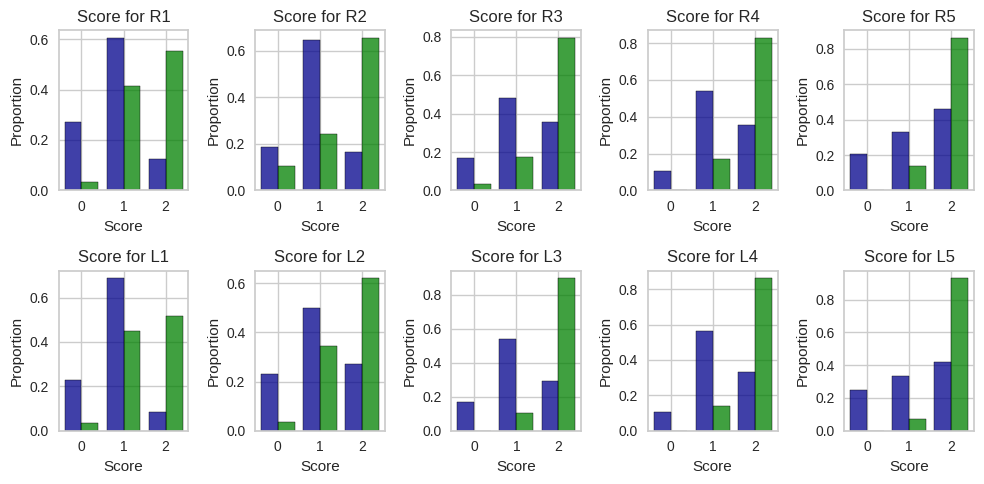

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

regions = ['R1', 'R2', 'R3', 'R4', 'R5',
           'L1', 'L2', 'L3', 'L4', 'L5']

bins = np.arange(0, 4, 1)

for i, region in enumerate(regions):
    ax = axs[i // 5, i % 5]
    sns.histplot(
        data=df1,
        x=region,
        hue='Surfactant',
        bins=bins,
        stat='probability',
        multiple='dodge',
        common_norm=False,
        palette=['darkblue', 'green'],
        ax=ax,
        # Adjust bar width and potentially add padding
        shrink=0.8  # Reduce bar width to create space
        # Consider adding padding using 'width' or manually adjusting bar positions
    )
    ax.set_xlabel('Score')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Score for {region}')

    # Adjust x-axis ticks and labels for better spacing
    ax.set_xticks([0.5, 1.5, 2.5])  # Set tick positions to score values
    ax.set_xticklabels(['0', '1', '2'])  # Set tick labels

    ax.legend_.remove()

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

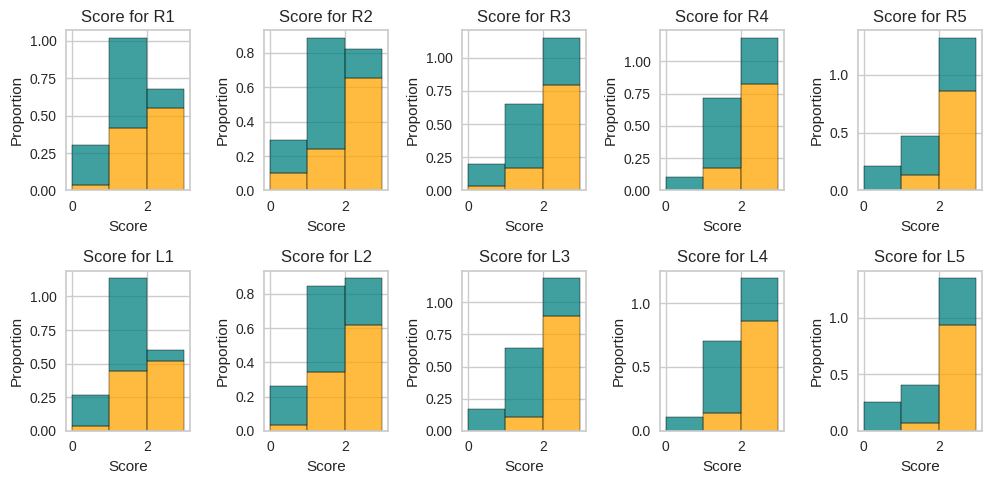

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

regions = ['R1', 'R2', 'R3', 'R4', 'R5',
           'L1', 'L2', 'L3', 'L4', 'L5']

bins = np.arange(0, 4, 1)

for i, region in enumerate(regions):
    ax = axs[i // 5, i % 5]
    sns.histplot(
        data=df1,
        x=region,
        hue='Surfactant',
        bins=bins,
        stat='probability',
        multiple='stack',
        common_norm=False,
        palette=['teal', 'orange'],
        ax=ax
    )
    ax.set_xlabel('Score')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Score for {region}')
    ax.legend_.remove()

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


The whole population scores are mainly  1 for L1, L2, R1, R2, and score 2 for other areas (axillary and posteriors)

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming df1 is your DataFrame

# List of regions to compare
regions = ['R1', 'R2', 'R3', 'R4', 'R5', 'L1', 'L2', 'L3', 'L4', 'L5']

# Perform Mann-Whitney U test for each region
for region in regions:
    # Separate data for the two groups
    group1 = df1[df1['Surfactant'] == 1][region]
    group2 = df1[df1['Surfactant'] == 0][region]

    # Perform the test
    stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')

    # Print results
    print(f"Region: {region}")
    print(f"Mann-Whitney U statistic: {stat}")
    print(f"P-value: {p_val}")
    print("-" * 20)  # Separator

Region: R1
Mann-Whitney U statistic: 1056.5
P-value: 2.9168328387899666e-05
--------------------
Region: R2
Mann-Whitney U statistic: 1021.0
P-value: 0.000185718891504055
--------------------
Region: R3
Mann-Whitney U statistic: 1010.0
P-value: 0.00025084451457590604
--------------------
Region: R4
Mann-Whitney U statistic: 1046.5
P-value: 3.655083243275564e-05
--------------------
Region: R5
Mann-Whitney U statistic: 997.0
P-value: 0.0002720159086922474
--------------------
Region: L1
Mann-Whitney U statistic: 1053.0
P-value: 1.9000508954666336e-05
--------------------
Region: L2
Mann-Whitney U statistic: 982.5
P-value: 0.00107230135961308
--------------------
Region: L3
Mann-Whitney U statistic: 1129.0
P-value: 4.0533141394420217e-07
--------------------
Region: L4
Mann-Whitney U statistic: 1082.0
P-value: 5.441840429236722e-06
--------------------
Region: L5
Mann-Whitney U statistic: 1072.5
P-value: 9.51345818309123e-06
--------------------


In [ ]:
# find proportion of score 0,1 and 2 for all regions (all grouped) in the population who receibed surfactant and the population who did not
# on the training cohort

df1_surfactant = df1[df1['Surfactant']==1]
df1_non_surfactant = df1[df1['Surfactant']==0]

df1_surfactant_2=0
df1_non_surfactant_2=0

for region in regions:
  for index in df1_surfactant.index:
    if df1_surfactant.loc[index,region]==2:
      df1_surfactant_2+=1

print("Number of regions scoring 2 are :", df1_surfactant_2)
print("Proportion of regions scoring 2 among patients receiving surfactant is:", (df1_surfactant_2/(df1_surfactant.shape[0]*10)))

for region in regions:
  for index in df1_non_surfactant.index:
    if df1_non_surfactant.loc[index,region]==2:
      df1_non_surfactant_2+=1

print("Number of regions scoring 2 are :", df1_non_surfactant_2)
print("Proportion of regions scoring 2 among patients not receiving surfactant is:", (df1_non_surfactant_2/(df1_non_surfactant.shape[0]*10)))




Number of regions scoring 2 are : 214
Proportion of regions scoring 2 among patients receiving surfactant is: 0.7379310344827587
Number of regions scoring 2 are : 136
Proportion of regions scoring 2 among patients not receiving surfactant is: 0.2833333333333333


# Models

In [ ]:
# df_shuffled = df1.sample(frac=1, random_state=62).reset_index(drop=True)   # can try changing the random state here

# # Calculate the split index (80% of the data)
# # split_index = int(len(df_shuffled) * 0.8)

# # Create train and test DataFrames
# train_df = df_shuffled.iloc[:split_index].copy()
# test_df = df_shuffled.iloc[split_index:].copy()

# print("Train shape:", train_df.shape)
# print("Test shape:", test_df.shape)


In [ ]:
# Create train and test DataFrames
train_df = df1
test_df = df2

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (77, 17)
Test shape: (44, 16)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Cases                  77 non-null     object  
 1   Diagnosis on patterns  77 non-null     object  
 2   6 regions              77 non-null     Int64   
 3   10 regions             76 non-null     Int64   
 4   Surfactant             77 non-null     Int64   
 5   GA                     77 non-null     Int64   
 6   R1                     77 non-null     Int64   
 7   R2                     77 non-null     Int64   
 8   R3                     77 non-null     Int64   
 9   R4                     77 non-null     Int64   
 10  R5                     77 non-null     Int64   
 11  L1                     77 non-null     Int64   
 12  L2                     77 non-null     Int64   
 13  L3                     77 non-null     Int64   
 14  L4                     77 non-null     Int64

# Minimum spanning tree

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx

In [ ]:
regions = ['R1', 'R2', 'R3', 'R4', 'R5',
            'L1', 'L2', 'L3', 'L4', 'L5']
df_MST = df1[regions]

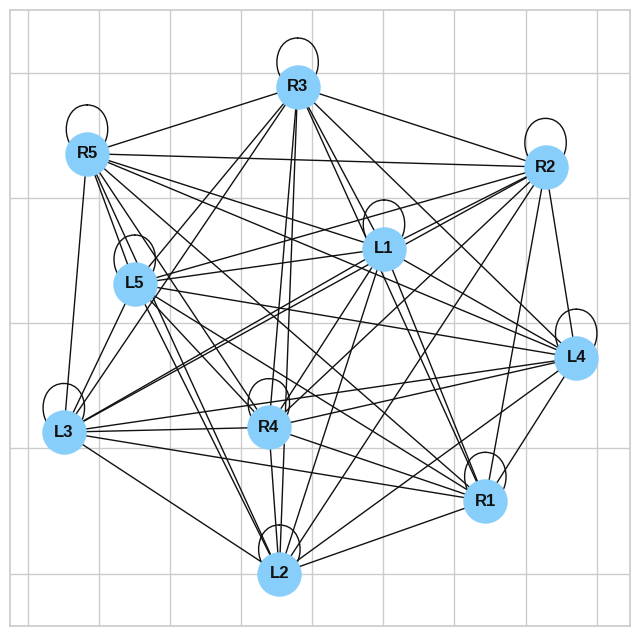

In [ ]:

G = nx.Graph(df_MST .corr())

figure = plt.figure(figsize = (8,8))
nx.draw_networkx(G, with_labels = True, node_size =1000, font_weight='bold', node_color='lightskyblue')

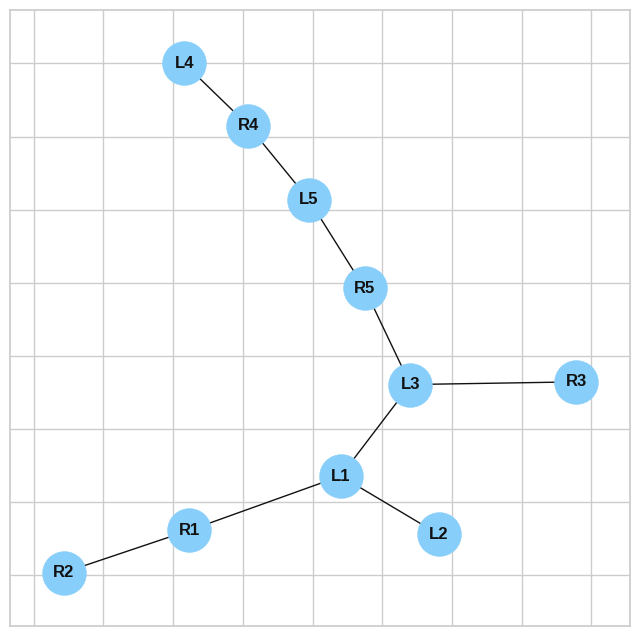

In [ ]:
#filter usinf the MST tree
distance = np.sqrt(2*(1-df_MST.corr()))
distance_graph = nx.Graph(distance)
graph_filtered = nx.minimum_spanning_tree(distance_graph)
figure = plt.figure(figsize = (8,8))
nx.draw_networkx(graph_filtered, with_labels = True, node_size =1000, font_weight='bold', node_color='lightskyblue'  )


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc, precision_recall_curve)

In [ ]:
df_30_minus = train_df[train_df['GA'] <= 30]
df_30_plus = train_df[train_df['GA'] > 30]

# Choose what data you want to study
df = train_df.copy()
# df = df_30_minus.copy()
# df = df_30_plus.copy()

In [ ]:
train_df[train_df['GA']>30].value_counts().sum()/len (train_df['GA']>30)

np.float64(0.5454545454545454)

In [ ]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve

columns = ['method', 'sensitivity', 'specificity','accuracy', 'precision', 'f1 score', 'auc', 'auprc', 'fn rate', 'fp rate','Youden index']
results = pd.DataFrame(columns=columns)


def get_metrics(y_pred, y_true):
    # Calculate the basic metrics

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Sensitivity and specificity from confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    youden_index = sensitivity + specificity - 1

    # AUC and AUPRC
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    precision_points, recall_points, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall_points, precision_points)

    # False negative rate and false positive rate
    fn_rate = fn / (fn + tp)
    fp_rate = fp / (fp + tn)

    return youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate


# Test

In [ ]:
# calculate metrics of score > or <9 to predict surfactant
y_true = test_df['Surfactant']

# Create predictions based on the '6 regions' score
y_pred_old = (test_df['6 regions'] >= 9).astype(int)  # 1 if score >= 9, 0 otherwise

youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred_old, y_true)

new_data = {
    'method': 'Baseline (6 regions>=9)',
    'Youden index':  sensitivity + specificity - 1,
    'sensitivity': sensitivity,
    'specificity': specificity,
    'accuracy': accuracy,
    'precision': precision,
    # 'recall': recall,
    'f1 score': f1,
    'auc': roc_auc,
    'auprc': pr_auc,
    'fn rate': fn_rate,
    'fp rate': fp_rate
}

results.loc[len(results)] = new_data

results

,method,sensitivity,specificity,accuracy,precision,f1 score,auc,auprc,fn rate,fp rate,Youden index
0,Baseline (6 regions>=9),0.833333,0.923077,0.886364,0.882353,0.857143,0.878205,0.891934,0.166667,0.076923,0.75641


In [ ]:

def predict_surfactant_rule_based(row):
    """Predicts surfactant administration based on rules for L3, L5, and L4."""
    if row['L3'] <= 1:  # Rule 1: If L3 <= 0, predict no surfactant
        return 0
    elif row['L3'] > 1 and row['L5'] <= 1:  # Rule 2: If L3 > 1 and R3 <= 0, predict no surfactant
        return 0
    elif row['L3'] > 1 and row['L5'] > 1 and row['L4'] > 1:  # Rule 3: If L3 > 1, R3 > 1, and L4 > 1, predict surfactant
        return 1
    elif row['L3'] > 1 and row['L5'] > 1 and row['L4'] <= 1:  # Rule 4: If L3 > 1, R3 > 1, and L4 <= 1, predict no surfactant
        return 0
    '''else:
        return -1  # Handle cases not covered by the rules (you might want to adjust this)'''

y_pred_new = test_df.apply(predict_surfactant_rule_based, axis=1)


youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred_new, y_true)
new_data = {
    'method': 'Rule based',
    'Youden index':  sensitivity + specificity - 1,
    'sensitivity': sensitivity,
    'specificity': specificity,
    'accuracy': accuracy,
    'precision': precision,
    # 'recall': recall,
    'f1 score': f1,
    'auc': roc_auc,
    'auprc': pr_auc,
    'fn rate': fn_rate,
    'fp rate': fp_rate
}


results.loc[len(results)] = new_data

results


,method,sensitivity,specificity,accuracy,precision,f1 score,auc,auprc,fn rate,fp rate,Youden index
0,Baseline (6 regions>=9),0.833333,0.923077,0.886364,0.882353,0.857143,0.878205,0.891934,0.166667,0.076923,0.756410
1,Rule based,0.833333,0.961538,0.909091,0.937500,0.882353,0.897436,0.919508,0.166667,0.038462,0.794872


In [ ]:
features = ['R1', 'R2', 'R3', 'R4', 'R5',
            'L1', 'L2', 'L3', 'L4', 'L5']
X = df[features]
y = df['Surfactant']

X_test = test_df[features]

# dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, min_samples_leaf= 1, min_samples_split= 2, random_state=42)
# y_pred_dt = cross_val_predict(dt, X, y, cv=5)
# metrics = get_metrics(y_pred_dt, y)


dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
dt.fit(X, y)


y_pred_test = dt.predict(X_test)

youden_index, sensitivity, specificity, accuracy, precision, recall, f1, roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred_test, y_true)


results.loc[len(results)] = {
    'method': 'Decision Tree',
    'Youden index': sensitivity + specificity - 1,
    'sensitivity': sensitivity,
    'specificity': specificity,
    'accuracy': accuracy,
    'precision': precision,
    'f1 score': f1,
    'auc': roc_auc,
    'auprc': pr_auc,
    'fn rate': fn_rate,
    'fp rate': fp_rate
}

results


,method,sensitivity,specificity,accuracy,precision,f1 score,auc,auprc,fn rate,fp rate,Youden index
0,Baseline (6 regions>=9),0.833333,0.923077,0.886364,0.882353,0.857143,0.878205,0.891934,0.166667,0.076923,0.756410
1,Rule based,0.833333,0.961538,0.909091,0.937500,0.882353,0.897436,0.919508,0.166667,0.038462,0.794872
2,Decision Tree,0.833333,0.961538,0.909091,0.937500,0.882353,0.897436,0.919508,0.166667,0.038462,0.794872
3,Decision Tree,0.833333,0.961538,0.909091,0.937500,0.882353,0.897436,0.919508,0.166667,0.038462,0.794872


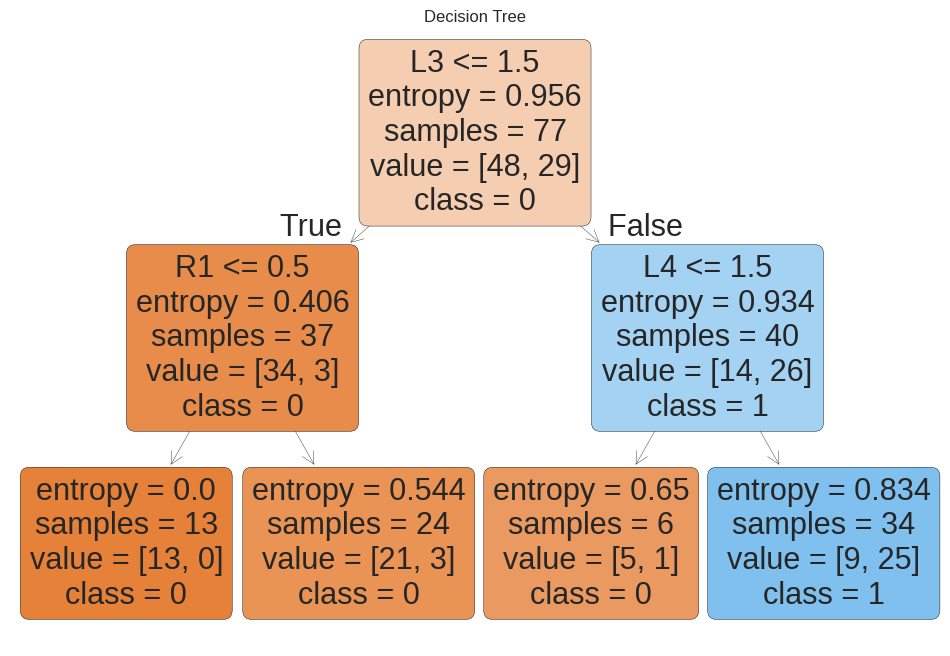

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(
    dt,
    feature_names=features,
    class_names=["0", "1"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree")
plt.show()


In [ ]:
from scipy import stats

# Step 1: Compute correctness (1 if prediction equals true label; else 0)
correct_old = (y_pred_old == y_true).astype(int)
correct_new = (y_pred_new == y_true).astype(int)

# Step 2: Compute the per-sample differences in correctness
# Difference: +1 if new is correct and old is wrong, -1 if new is wrong and old is correct, 0 otherwise.
difference = correct_new - correct_old

# Step 3: Test for normality of the differences using Shapiro-Wilk Test
stat_norm, p_norm = stats.shapiro(difference)
print("Shapiro-Wilk test for normality: statistic = {:.3f}, p-value = {:.3f}".format(stat_norm, p_norm))

# Step 4: Choose and perform the appropriate paired statistical test
if p_norm < 0.05:
    print("Differences are not normally distributed. Using Wilcoxon signed-rank test.")
    stat, p_val = stats.wilcoxon(difference)
else:
    print("Differences appear normally distributed. Using paired t-test.")
    stat, p_val = stats.ttest_rel(correct_new, correct_old)

print("Test statistic: {:.3f}, p-value: {:.3f}".format(stat, p_val))

# Step 5: Calculate the effect size (Cohen's d for paired samples)
mean_diff = np.mean(difference)
std_diff = np.std(difference, ddof=1)  # sample standard deviation
cohen_d = mean_diff / std_diff if std_diff != 0 else float('inf')  # Avoid division by zero

print("Mean difference (new - old): {:.3f}".format(mean_diff))
print("Cohen's d (effect size): {:.3f}".format(cohen_d))

# Bootstrapping to calculate the 95% Confidence Interval (CI) for the mean difference
B = 10  # Number of bootstrap samples
bootstrap_means = np.empty(B)
n = len(difference)

for i in range(B):
    # Resample the differences with replacement
    bootstrap_sample = np.random.choice(difference, size=n, replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate the 2.5th and 97.5th percentiles for the 95% CI
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

print("Bootstrapped 95% Confidence Interval for the mean difference: [{:.3f}, {:.3f}]".format(ci_lower, ci_upper))

# Interpretation:
if p_val < 0.05:
    print("\nConclusion: The difference in performance is statistically significant (p < 0.05).")
else:
    print("\nConclusion: The difference in performance is not statistically significant (p >= 0.05).")


Shapiro-Wilk test for normality: statistic = 0.341, p-value = 0.000
Differences are not normally distributed. Using Wilcoxon signed-rank test.
Test statistic: 2.000, p-value: 0.564
Mean difference (new - old): 0.023
Cohen's d (effect size): 0.086
Bootstrapped 95% Confidence Interval for the mean difference: [0.000, 0.045]

Conclusion: The difference in performance is not statistically significant (p >= 0.05).


In [ ]:
import numpy as np
import pandas as pd

# Assume get_metrics is a function that takes predictions and true labels,
# and returns the following in order:
# youden_index, sensitivity, specificity, accuracy, precision, recall, f1, roc_auc, pr_auc, fn_rate, fp_rate

def bootstrap_metrics(test_df, n_bootstraps=1000, random_seed=42):
    """
    Bootstraps the test_df to compute the 95% CI for various performance metrics.

    Parameters:
        test_df (pd.DataFrame): The dataset containing the true labels and score.
        n_bootstraps (int): The number of bootstrap iterations.
        random_seed (int): Seed for reproducibility.

    Returns:
        ci_dict (dict): A dictionary with metric names as keys and (lower, upper)
                        tuples for the 95% CI as values.
    """
    rng = np.random.default_rng(random_seed)

    # Initialize containers for each metric
    boot_metrics = {
        'Youden index': [],
        'sensitivity': [],
        'specificity': [],
        'accuracy': [],
        'precision': [],
        'f1 score': [],
        'auc': [],
        'auprc': [],
        'fn rate': [],
        'fp rate': []
    }

    # Bootstrap iterations
    for i in range(n_bootstraps):
        # Create a bootstrap sample (sample with replacement)
        sample_df = test_df.sample(frac=1, replace=True, random_state=rng.integers(0, 1e9))

        # Extract true values and compute predictions based on the "6 regions" score
        y_true_sample = sample_df['Surfactant']
        y_pred_sample = (sample_df['6 regions'] >= 9).astype(int)

        # Get the performance metrics for this bootstrap sample.
        # The get_metrics function should return the following metrics in order.
        youden_index, sensitivity, specificity, accuracy, precision, recall, f1, roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred_sample, y_true_sample)

        # We compute the Youden index using sensitivity and specificity.
        boot_metrics['Youden index'].append(sensitivity + specificity - 1)
        boot_metrics['sensitivity'].append(sensitivity)
        boot_metrics['specificity'].append(specificity)
        boot_metrics['accuracy'].append(accuracy)
        boot_metrics['precision'].append(precision)
        boot_metrics['f1 score'].append(f1)
        boot_metrics['auc'].append(roc_auc)
        boot_metrics['auprc'].append(pr_auc)
        boot_metrics['fn rate'].append(fn_rate)
        boot_metrics['fp rate'].append(fp_rate)

    # Compute the 2.5th and 97.5th percentiles for each metric as the 95% CI.
    ci_dict = {}
    for metric, values in boot_metrics.items():
        lower = np.percentile(values, 2.5)
        upper = np.percentile(values, 97.5)
        ci_dict[metric] = (lower, upper)

    return ci_dict

# Example usage:
# Assuming test_df is your DataFrame and get_metrics is defined:

ci_results = bootstrap_metrics(test_df, n_bootstraps=10, random_seed=42)
print("95% Confidence Intervals for the metrics:")
for metric, ci in ci_results.items():
    print(f"{metric}: {ci}")


95% Confidence Intervals for the metrics:
Youden index: (np.float64(0.6491452991452991), np.float64(0.9218750000000001))
sensitivity: (np.float64(0.7222222222222222), np.float64(0.9785714285714286))
specificity: (np.float64(0.8932692307692307), np.float64(1.0))
accuracy: (np.float64(0.8409090909090909), np.float64(0.9545454545454546))
precision: (np.float64(0.8310924369747898), np.float64(1.0))
f1 score: (np.float64(0.7906060606060605), np.float64(0.9322619047619047))
auc: (np.float64(0.8245726495726496), np.float64(0.9609375))
auprc: (np.float64(0.8467646528308292), np.float64(0.9591783216783216))
fn rate: (np.float64(0.02142857142857143), np.float64(0.2777777777777778))
fp rate: (np.float64(0.0), np.float64(0.10673076923076925))


# Baseline model

In [ ]:
y_true = df['Surfactant']

In [ ]:
# calculate metrics of score > or <9 to predict surfactant


# Create predictions based on the '6 regions' score
y_pred = (df['6 regions'] >= 9).astype(int)  # 1 if score >= 9, 0 otherwise

youden_index = get_metrics(y_pred, y_true)
youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred, y_true)

new_data = {
    'method': 'Baseline (6 regions>=9)',
    'Youden index':  sensitivity + specificity - 1,
    'sensitivity': sensitivity,
    'specificity': specificity,
    'accuracy': accuracy,
    'precision': precision,
    # 'recall': recall,
    'f1 score': f1,
    'auc': roc_auc,
    'auprc': pr_auc,
    'fn rate': fn_rate,
    'fp rate': fp_rate
}

results.loc[len(results)] = new_data

results

,method,sensitivity,specificity,accuracy,precision,f1 score,auc,auprc,fn rate,fp rate,Youden index
0,Baseline (6 regions>=9),0.833333,0.923077,0.886364,0.882353,0.857143,0.878205,0.891934,0.166667,0.076923,0.756410
1,Rule based,0.833333,0.961538,0.909091,0.937500,0.882353,0.897436,0.919508,0.166667,0.038462,0.794872
2,Decision Tree,0.833333,0.961538,0.909091,0.937500,0.882353,0.897436,0.919508,0.166667,0.038462,0.794872
3,Baseline (6 regions>=9),0.793103,0.770833,0.779221,0.676471,0.730159,0.781968,0.773748,0.206897,0.229167,0.563937


# Rule based

In [ ]:

def predict_surfactant_rule_based(row):
    """Predicts surfactant administration based on rules for L3, L5, and L4."""
    if row['L3'] <= 1:  # Rule 1: If L3 <= 0, predict no surfactant
        return 0
    elif row['L3'] > 1 and row['L5'] <= 1:  # Rule 2: If L3 > 1 and R3 <= 0, predict no surfactant
        return 0
    elif row['L3'] > 1 and row['L5'] > 1 and row['L4'] > 1:  # Rule 3: If L3 > 1, R3 > 1, and L4 > 1, predict surfactant
        return 1
    elif row['L3'] > 1 and row['L5'] > 1 and row['L4'] <= 1:  # Rule 4: If L3 > 1, R3 > 1, and L4 <= 1, predict no surfactant
        return 0
    '''else:
        return -1  # Handle cases not covered by the rules (you might want to adjust this)'''

y_pred = df.apply(predict_surfactant_rule_based, axis=1)


youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred, y_true)
new_data = {
    'method': 'Rule based',
    'Youden index':  sensitivity + specificity - 1,
    'sensitivity': sensitivity,
    'specificity': specificity,
    'accuracy': accuracy,
    'precision': precision,
    # 'recall': recall,
    'f1 score': f1,
    'auc': roc_auc,
    'auprc': pr_auc,
    'fn rate': fn_rate,
    'fp rate': fp_rate
}


results.loc[len(results)] = new_data

results


,method,sensitivity,specificity,accuracy,precision,f1 score,auc,auprc,fn rate,fp rate,Youden index
0,Baseline (6 regions>=9),0.833333,0.923077,0.886364,0.882353,0.857143,0.878205,0.891934,0.166667,0.076923,0.756410
1,Rule based,0.833333,0.961538,0.909091,0.937500,0.882353,0.897436,0.919508,0.166667,0.038462,0.794872
2,Decision Tree,0.833333,0.961538,0.909091,0.937500,0.882353,0.897436,0.919508,0.166667,0.038462,0.794872
3,Baseline (6 regions>=9),0.793103,0.770833,0.779221,0.676471,0.730159,0.781968,0.773748,0.206897,0.229167,0.563937
4,Rule based,0.862069,0.833333,0.844156,0.757576,0.806452,0.847701,0.835796,0.137931,0.166667,0.695402


In [ ]:
'''import numpy as np
import pandas as pd

# Function to apply the rule-based model
def predict_surfactant_rule_based(row):
    """Predicts surfactant administration based on rules for L3, L5, and L4."""
    if row['L3'] <= 1:  # Rule 1: If L3 <= 0, predict no surfactant
        return 0
    elif row['L3'] > 1 and row['R1'] > 1:  # Rule 3: If L3 > 1, R3 > 1, and L4 > 1, predict surfactant
        return 1
    elif row['L3'] > 1 and row['L4'] > 1:  # Rule 3: If L3 > 1, R3 > 1, and L4 > 1, predict surfactant
        return 1
    elif row['L3'] > 1 and row['L4'] <= 1:  # Rule 4: If L3 > 1, R3 > 1, and L4 <= 1, predict no surfactant
        return 0

def rule_based_model(data):
  predictions = test_df.apply(predict_surfactant_rule_based, axis=1)
  return predictions

# Parameters for simulation
n_simulations = 1000
sample_size = len(df1)  # Use the original data size as reference
accuracy_threshold = 0.8

# Store results
accuracies = []

# Simulation loop
for _ in range(n_simulations):
  # Simulate data (adjust distributions and effect sizes as needed)
  simulated_data = pd.DataFrame({
    'L3': np.random.randint(0, 4, size=sample_size),
    'R1': np.random.randint(0, 4, size=sample_size),
    'L4': np.random.randint(0, 4, size=sample_size),
    # Add other relevant variables with their distributions
  })

  # Apply the model and calculate accuracy
  predictions = rule_based_model(simulated_data)
  # (Assume you have 'Surfactant' column in the original df1)
  accuracy = np.mean(predictions == test_df['Surfactant'])
  accuracies.append(accuracy)

# Estimate power
power = np.mean(np.array(accuracies) >= accuracy_threshold)
print(f"Power of the rule-based model: {power}")'''

Power of the rule-based model: 1.0


In [ ]:
# features = ['Maternal Antenatal steroids (Complete/Incomplete/Unknown)', 'GA',
#             'R1', 'R2', 'R3', 'R4', 'R5',
#             'L1', 'L2', 'L3', 'L4', 'L5']
features = ['R1', 'R2', 'R3', 'R4', 'R5',
            'L1', 'L2', 'L3', 'L4', 'L5']
# features = ['L3', 'L4', 'L5']
X = df[features]
y = df['Surfactant']

In [ ]:
cv_folds = 5  # You can adjust the number of folds


### Logistic Regression

In [ ]:
# ----- Logistic Regression -----
lr = LogisticRegression(solver='liblinear')
y_pred_lr = cross_val_predict(lr, X, y, cv=cv_folds)
metrics = get_metrics(y_pred_lr, y)
results.loc[len(results)] =  {
    'method': 'logistic regression random seed 62',
    'Youden index':  sensitivity + specificity - 1,
    'sensitivity': sensitivity,
    'specificity': specificity,
    'accuracy': accuracy,
    'precision': precision,
    # 'recall': recall,
    'f1 score': f1,
    'auc': roc_auc,
    'auprc': pr_auc,
    'fn rate': fn_rate,
    'fp rate': fp_rate
}

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X, y)  # Fit the model on the entire dataset

# Access the coefficients
coefficients = lr.coef_
intercept = lr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[ 0.52269213 -0.07745705 -0.31578707 -0.00645647 -0.40159056  0.5839316
  -0.36549758  0.88261651  0.2377605   0.59760523]]
Intercept: [-2.58781673]


Grid search to find optimal parameters for the algo

## Decision Tree

In [ ]:
from sklearn.metrics import make_scorer
def youden_index_scorer(y_true, y_pred):
       tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
       sensitivity = tp / (tp + fn)
       specificity = tn / (tn + fp)
       return sensitivity + specificity - 1
youden_scorer = make_scorer(youden_index_scorer)

In [ ]:
# from sklearn.model_selection import GridSearchCV, cross_val_predict

# # Define the parameter grid for Decision Tree.
# param_grid = {
#     'max_depth': [None, 2, 3, 4, 5],
#     'min_samples_split': [2, 3, 4, 8],
#     'min_samples_leaf': [1, 2, 3, 5, 10],
#     'criterion': ['gini', 'entropy']
# }

# # Initialize the Decision Tree classifier.
# dt = DecisionTreeClassifier(random_state=42)

# # Set up GridSearchCV with 5-fold cross-validation.
# grid_search = GridSearchCV(dt, param_grid, cv=5, scoring=youden_scorer)
# grid_search.fit(X, y)

# print("Best parameters found:", grid_search.best_params_)
# print("Best cross-validation youden:", grid_search.best_score_)

# # Get the best estimator.
# best_dt = grid_search.best_estimator_

# # Use cross_val_predict with the best estimator.
# y_pred_grid = cross_val_predict(best_dt, X, y, cv=5)


# # Compute metrics on the cross-validated predictions.
# metrics = get_metrics(y_pred_grid, y)

# results.loc[len(results)] = {
#     'method': 'Decision Tree (GridSearch)',
#     'sensitivity': metrics[0],
#     'specificity':metrics[1],
#     'accuracy': metrics[2],
#     'precision': metrics[3],
#     'f1 score': metrics[4],
#     'auc': metrics[5],
#     'auprc': metrics[6],
#     'fn rate': metrics[7],
#     'fp rate': metrics[8],
#     'Youden index':  metrics[9],
# }


## Random forest

In [ ]:
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 2, 3, 4],
#     'min_samples_split': [2, 3, 4],
#     'min_samples_leaf': [1, 2, 3],
#     'criterion': ['gini', 'entropy']
# }

# rf = RandomForestClassifier(random_state=42)
# grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=cv_folds, scoring=youden_scorer)
# grid_search_rf.fit(X, y)

# print("Best parameters for Random Forest:", grid_search_rf.best_params_)
# print("Best cross-validation accuracy for RF:", grid_search_rf.best_score_)

# best_rf = grid_search_rf.best_estimator_
# y_pred_rf = cross_val_predict(best_rf, X, y, cv=cv_folds)
# metrics_rf = get_metrics(y_pred_rf, y)

# results.loc[len(results)] = {
#     'method': 'Random Forest (GridSearch)',
#    'sensitivity': metrics[0],
#     'specificity':metrics[1],
#     'accuracy': metrics[2],
#     'precision': metrics[3],
#     'f1 score': metrics[4],
#     'auc': metrics[5],
#     'auprc': metrics[6],
#     'fn rate': metrics[7],
#     'fp rate': metrics[8],
#     'Youden index':  metrics[9],
# }


## Gradient boosting

In [ ]:
# param_grid_gb = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [2, 3, 4],
#     'min_samples_split': [2, 3, 4],
#     'min_samples_leaf': [1, 2, 3]
# }

# gb = GradientBoostingClassifier(random_state=42)
# grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=cv_folds, scoring=youden_scorer)
# grid_search_gb.fit(X, y)

# print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
# print("Best cross-validation accuracy for GB:", grid_search_gb.best_score_)

# best_gb = grid_search_gb.best_estimator_
# y_pred_gb = cross_val_predict(best_gb, X, y, cv=cv_folds)
# metrics_gb = get_metrics(y_pred_gb, y)

# results.loc[len(results)] = {
#     'method': 'Gradient Boosting (GridSearch)',
#      'sensitivity': metrics[0],
#     'specificity':metrics[1],
#     'accuracy': metrics[2],
#     'precision': metrics[3],
#     'f1 score': metrics[4],
#     'auc': metrics[5],
#     'auprc': metrics[6],
#     'fn rate': metrics[7],
#     'fp rate': metrics[8],
#     'Youden index':  metrics[9],
# }


In [ ]:
# ----- Decision Tree -----
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, min_samples_leaf= 1, min_samples_split= 2, random_state=42)
y_pred_dt = cross_val_predict(dt, X, y, cv=cv_folds)
metrics = get_metrics(y_pred_dt, y)

youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred_dt, y)
results.loc[len(results)] = {
    'method': 'Decision Tree',
    'Youden index':  sensitivity + specificity - 1,
    'sensitivity': sensitivity,
    'specificity': specificity,
    'accuracy': accuracy,
    'precision': precision,
    # 'recall': recall,
    'f1 score': f1,
    'auc': roc_auc,
    'auprc': pr_auc,
    'fn rate': fn_rate,
    'fp rate': fp_rate
}

# ----- Random Forest -----
rf = RandomForestClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 2, min_samples_split= 2, n_estimators=200, random_state=42)
y_pred_rf = cross_val_predict(rf, X, y, cv=cv_folds)
youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred_rf, y)
results.loc[len(results)] = {
    'method': 'Random Forest',
    'Youden index':  sensitivity + specificity - 1,
    'sensitivity': sensitivity,
    'specificity': specificity,
    'accuracy': accuracy,
    'precision': precision,
    # 'recall': recall,
    'f1 score': f1,
    'auc': roc_auc,
    'auprc': pr_auc,
    'fn rate': fn_rate,
    'fp rate': fp_rate
}

# ----- Gradient Boosting -----
gb = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 2, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 200, random_state=42)
y_pred_gb = cross_val_predict(gb, X, y, cv=cv_folds)

youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred_gb, y)
results.loc[len(results)] = {
    'method': 'Gradient Boosting',
    'Youden index':  sensitivity + specificity - 1,
    'sensitivity': sensitivity,
    'specificity': specificity,
    'accuracy': accuracy,
    'precision': precision,
    # 'recall': recall,
    'f1 score': f1,
    'auc': roc_auc,
    'auprc': pr_auc,
    'fn rate': fn_rate,
    'fp rate': fp_rate
}


In [ ]:
results

{'features': ['L3', 'L4', 'L5'],
 'Youden index': np.float64(0.6120689655172413),
 'sensitivity': np.float64(0.8620689655172413),
 'specificity': np.float64(0.75),
 'accuracy': 0.7922077922077922,
 'precision': 0.6756756756756757,
 'f1 score': 0.7575757575757576,
 'auc': np.float64(0.8060344827586207),
 'auprc': np.float64(0.7948463465704845),
 'fn rate': np.float64(0.13793103448275862),
 'fp rate': np.float64(0.25)}

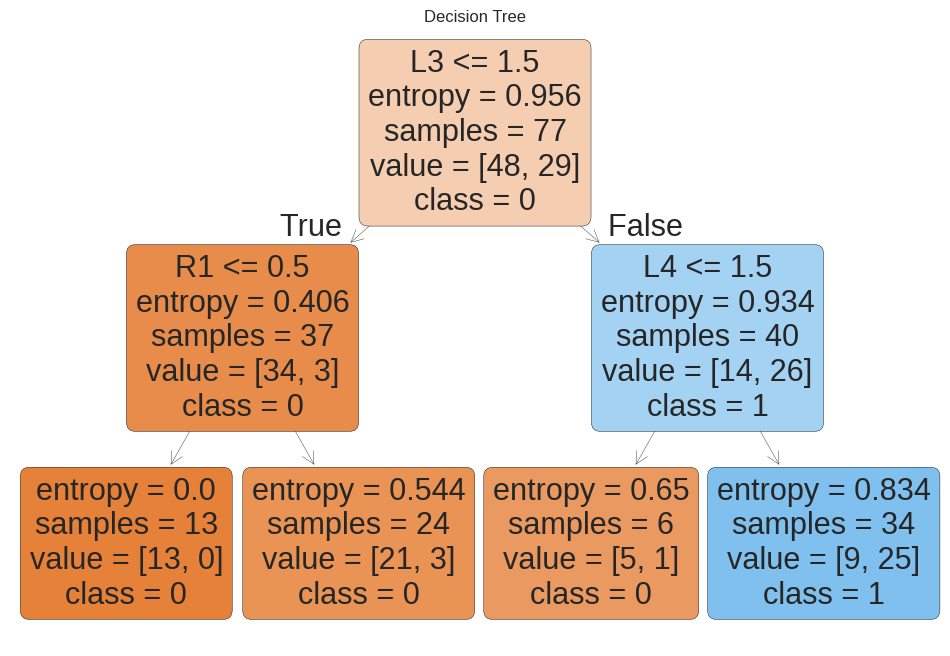

In [ ]:
# Visualize the tree

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Fit the decision tree on the entire dataset
dt_full = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
dt_full.fit(X, y)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(
    dt_full,
    feature_names=features,
    class_names=["0", "1"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree")
plt.show()


In [ ]:
import itertools
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

# Define all features and target variable
features = ['R1', 'R2', 'R3', 'R4', 'R5',
            'L1', 'L2', 'L4', 'L5']
target = 'Surfactant'

# Create a list of features excluding L3 (which we always want to include)
other_features = [f for f in features if f != 'L3']

# Initialize variables to store the best combination
best_accuracy = 0
best_fn = 1
best_features = None
best_metrics = None

# List to store all results (optional, for further inspection)
results_list = []

# Iterate over combinations: we want at most 3 features total.
# Since L3 must be included, we choose 0, 1, or 2 additional features.
for k in range(0, 3):  # k additional features (total features = k + 1)
    for combo in itertools.combinations(other_features, k):
        # Always include 'L3'
        current_features = list(combo) + ['L3']
        current_features.sort()  # optional: sort for consistency

        # Select data using the current feature set
        X = df[current_features]
        y = df[target]

        # ----- Logistic Regression -----
        lr = LogisticRegression(solver='liblinear')
        y_pred_lr = cross_val_predict(lr, X, y, cv=cv_folds)

        youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred_lr, y)
        result = {
            'features': current_features,
            'Youden index':  sensitivity + specificity - 1,
            'sensitivity': sensitivity,
            'specificity': specificity,
            'accuracy': accuracy,
            'precision': precision,
            # 'recall': recall,
            'f1 score': f1,
            'auc': roc_auc,
            'auprc': pr_auc,
            'fn rate': fn_rate,
            'fp rate': fp_rate
        }
        accuracy = youden_index
        fn =  fn_rate



        results_list.append(result)
        print("Tested features:", current_features, "-> Accuracy:", accuracy)

        # Update the best combination if the current one is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = current_features
            best_metrics = metrics

        elif accuracy == best_accuracy and fn < best_fn:
            best_accuracy = accuracy
            best_fn = fn
            best_features = current_features
            best_metrics = metrics


# Optionally, convert the results into a DataFrame
results_df = pd.DataFrame(results_list)

print("\nBest feature combination:", best_features)
print("Best accuracy:", best_accuracy)
print("Best fn:", best_fn)


Tested features: ['L3'] -> Accuracy: 0.6048850574712645
Tested features: ['L3', 'R1'] -> Accuracy: 0.4260057471264367
Tested features: ['L3', 'R2'] -> Accuracy: 0.5704022988505746
Tested features: ['L3', 'R3'] -> Accuracy: 0.6048850574712645
Tested features: ['L3', 'R4'] -> Accuracy: 0.5222701149425286
Tested features: ['L3', 'R5'] -> Accuracy: 0.6048850574712645
Tested features: ['L1', 'L3'] -> Accuracy: 0.43965517241379315
Tested features: ['L2', 'L3'] -> Accuracy: 0.6048850574712645
Tested features: ['L3', 'L4'] -> Accuracy: 0.6329022988505746
Tested features: ['L3', 'L5'] -> Accuracy: 0.646551724137931
Tested features: ['L3', 'R1', 'R2'] -> Accuracy: 0.3706896551724137
Tested features: ['L3', 'R1', 'R3'] -> Accuracy: 0.38433908045977017
Tested features: ['L3', 'R1', 'R4'] -> Accuracy: 0.43965517241379315
Tested features: ['L3', 'R1', 'R5'] -> Accuracy: 0.4051724137931034
Tested features: ['L1', 'L3', 'R1'] -> Accuracy: 0.5021551724137931
Tested features: ['L2', 'L3', 'R1'] -> Accur

In [ ]:
import itertools
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

# Define all features and target variable
features = ['R1', 'R2', 'R3', 'R4', 'R5',
            'L1', 'L2', 'L4', 'L5']
target = 'Surfactant'

# Create a list of features excluding L3 (which we always want to include)
other_features = [f for f in features if f != 'L3']

# Initialize variables to store the best combination
best_youden = 0
best_fn = 1
best_features = None
best_metrics = None

# List to store all results (optional, for further inspection)
results_list = []

# Iterate over combinations: we want at most 3 features total.
# Since L3 must be included, we choose 0, 1, or 2 additional features.
for k in range(0, 3):  # k additional features (total features = k + 1)
    for combo in itertools.combinations(other_features, k):
        # Always include 'L3'
        current_features = list(combo) + ['L3']
        current_features.sort()  # optional: sort for consistency

        # Select data using the current feature set
        X = df[current_features]
        y = df[target]

        # ----- Logistic Regression -----
        lr = LogisticRegression(solver='liblinear')
        y_pred_lr = cross_val_predict(lr, X, y, cv=cv_folds)

        youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred_lr, y)
        results = {
            'features': current_features,
            'Youden index':  sensitivity + specificity - 1,
            'sensitivity': sensitivity,
            'specificity': specificity,
            'accuracy': accuracy,
            'precision': precision,
            # 'recall': recall,
            'f1 score': f1,
            'auc': roc_auc,
            'auprc': pr_auc,
            'fn rate': fn_rate,
            'fp rate': fp_rate
        }
        youden = youden_index
        fn =  fn_rate


        results_list.append(result)
        print("Tested features:", current_features, "-> Youden:", youden)

        # Update the best combination if the current one is better
        if  youden > best_youden:
            best_youden =  youden
            best_features = current_features
            best_metrics = metrics

        elif  youden== best_youden and fn < best_fn:
            best_youden = youden
            best_features = current_features
            best_metrics = metrics

        elif youden ==best_youden and fn < best_fn:
            best_youden = youden
            best_fn = fn
            best_features = current_features
            best_metrics = metrics


# Optionally, convert the results into a DataFrame
results_df = pd.DataFrame(results_list)

print("\nBest feature combination:", best_features)
print("Best Youden:", best_youden)
print("Best fn:", best_fn)


Tested features: ['L3'] -> Youden: 0.6048850574712645
Tested features: ['L3', 'R1'] -> Youden: 0.4260057471264367
Tested features: ['L3', 'R2'] -> Youden: 0.5704022988505746
Tested features: ['L3', 'R3'] -> Youden: 0.6048850574712645
Tested features: ['L3', 'R4'] -> Youden: 0.5222701149425286
Tested features: ['L3', 'R5'] -> Youden: 0.6048850574712645
Tested features: ['L1', 'L3'] -> Youden: 0.43965517241379315
Tested features: ['L2', 'L3'] -> Youden: 0.6048850574712645
Tested features: ['L3', 'L4'] -> Youden: 0.6329022988505746
Tested features: ['L3', 'L5'] -> Youden: 0.646551724137931
Tested features: ['L3', 'R1', 'R2'] -> Youden: 0.3706896551724137
Tested features: ['L3', 'R1', 'R3'] -> Youden: 0.38433908045977017
Tested features: ['L3', 'R1', 'R4'] -> Youden: 0.43965517241379315
Tested features: ['L3', 'R1', 'R5'] -> Youden: 0.4051724137931034
Tested features: ['L1', 'L3', 'R1'] -> Youden: 0.5021551724137931
Tested features: ['L2', 'L3', 'R1'] -> Youden: 0.41882183908045967
Tested 

In [ ]:
X = df[['L3', 'L4','R3']]


lr = LogisticRegression(solver='liblinear')
y_pred_lr = cross_val_predict(lr, X, y, cv=cv_folds)
metrics = get_metrics(y_pred_lr, y)

results.loc[len(results)] = {
    'method': 'Logistic Regression - feature selection random seed 25',
    'sensitivity': metrics[0],
    'specificity':metrics[1],
    'accuracy': metrics[2],
    'precision': metrics[3],
    'f1 score': metrics[4],
    'auc': metrics[5],
    'auprc': metrics[6],
    'fn rate': metrics[7],
    'fp rate': metrics[8],
     'Youden index':  (metrics[0] + metrics[1] -1),
}

AttributeError: 'dict' object has no attribute 'loc'

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X, y)  # Fit the model on the entire dataset

# Access the coefficients
coefficients = lr.coef_
intercept = lr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Coeff from ['L3', 'R4']

In [ ]:
X = df[['L3', 'L5', 'L4']]  # previous seed: ['L3', 'L4', 'R3']


dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, min_samples_leaf= 1, min_samples_split= 2, random_state=42)
y_pred_dt = cross_val_predict(dt, X, y, cv=cv_folds)
metrics = get_metrics(y_pred_dt, y)


results.loc[len(results)] = {
    'method': 'Decision Tree - feature selection random seed 25',
    'sensitivity': metrics[0],
    'specificity':metrics[1],
    'accuracy': metrics[2],
    'precision': metrics[3],
    'f1 score': metrics[4],
    'auc': metrics[5],
    'auprc': metrics[6],
    'fn rate': metrics[7],
    'fp rate': metrics[8],
    'Youden index':  (metrics[0] + metrics[1] -1),
}


IndexError: list index out of range

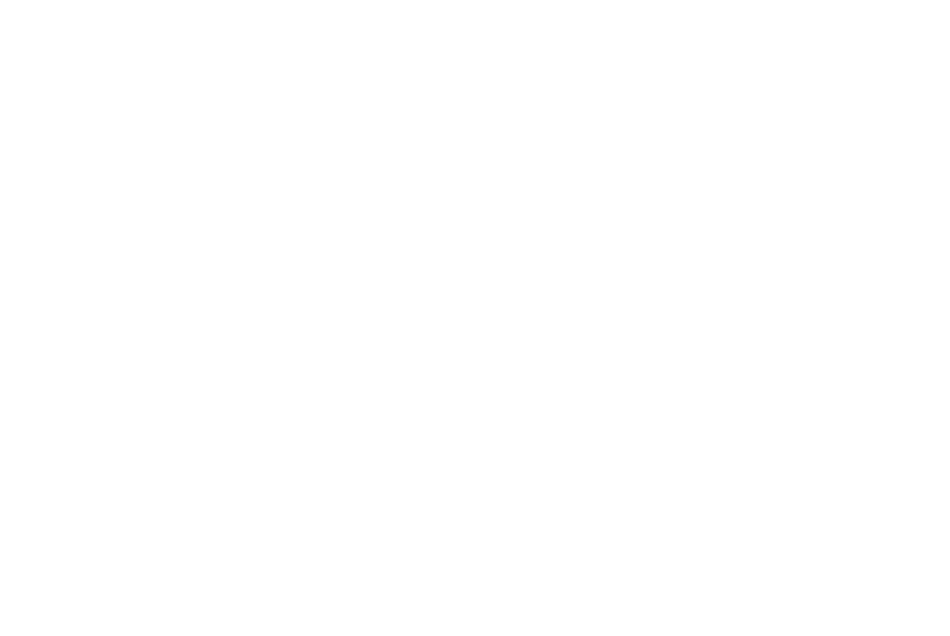

In [ ]:
# Visualize the tree
# Fit the decision tree on the entire dataset
dt_full = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
dt_full.fit(X, y)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(
    dt_full,
    feature_names=['L3', 'L4', 'L5'],  #['L3', 'L4', 'R3']
    class_names=["0", "1"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree feature selection random seed 25")
plt.show()


In [ ]:
results

In [ ]:
df_train.info()

# Run best models on unseen test set

In [ ]:
results.columns

In [ ]:
columns = ['method', 'sensitivity', 'specificity', 'accuracy', 'precision',
       'f1 score', 'auc', 'auprc', 'fn rate', 'fp rate', 'Youden index']
results_test = pd.DataFrame(columns=columns)


In [ ]:
y_true = test_df['Surfactant']

In [ ]:
y_pred = (test_df['6 regions'] >= 9).astype(int)  # 1 if score >= 9, 0 otherwise

youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred, y_true)
new_data = {
    'method': 'Baseline (6 regions>=9)',
    'sensitivity': metrics[0],
    'specificity':metrics[1],
    'accuracy': metrics[2],
    'precision': metrics[3],
    'f1 score': metrics[4],
    'auc': metrics[5],
    'auprc': metrics[6],
    'fn rate': metrics[7],
    'fp rate': metrics[8],
    'Youden index':  (metrics[0] + metrics[1] -1),
}

results_test.loc[len(results_test)] = new_data


In [ ]:
def predict_surfactant_rule_based(row):
    """Predicts surfactant administration based on rules for L3, L5, and L4."""
    if row['L3'] <= 1:  # Rule 1: If L3 <= 0, predict no surfactant
        return 0
    elif row['L3'] > 1 and row['L5'] <= 1:  # Rule 2: If L3 > 1 and R3 <= 0, predict no surfactant
        return 0
    elif row['L3'] > 1 and row['L5'] > 1 and row['L4'] > 1:  # Rule 3: If L3 > 1, R3 > 1, and L4 > 1, predict surfactant
        return 1
    elif row['L3'] > 1 and row['L5'] > 1 and row['L4'] <= 1:  # Rule 4: If L3 > 1, R3 > 1, and L4 <= 1, predict no surfactant
        return 0
    '''else:
        return -1  # Handle cases not covered by the rules (you might want to adjust this)'''

y_pred_rb = test_df.apply(predict_surfactant_rule_based, axis=1)



In [ ]:
youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred_rb, y_true)
new_data = {
    'method': 'Rule based',
    'sensitivity': metrics[0],
    'specificity':metrics[1],
    'accuracy': metrics[2],
    'precision': metrics[3],
    'f1 score': metrics[4],
    'auc': metrics[5],
    'auprc': metrics[6],
    'fn rate': metrics[7],
    'fp rate': metrics[8],
    'Youden index':  (metrics[0] + metrics[1] -1),
}

results_test.loc[len(results_test)] = new_data


ValueError: Input y_pred contains NaN.

In [ ]:
# Fit the decision tree on the train dataset
dt_full = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
dt_full.fit(X, y)

# Predict on test using the fitted model
X_test = test_df[['L3', 'L5', 'L4']]
y_pred_dt = dt_full.predict(X_test)

youden_index, sensitivity, specificity, accuracy, precision, recall, f1,  roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(y_pred_dt, y_true)
new_data = {
    'method': 'Decision tree - feature selection',
    'sensitivity': metrics[0],
    'specificity':metrics[1],
    'accuracy': metrics[2],
    'precision': metrics[3],
    'f1 score': metrics[4],
    'auc': metrics[5],
    'auprc': metrics[6],
    'fn rate': metrics[7],
    'fp rate': metrics[8],
    'Youden index':  (metrics[0] + metrics[1] -1),
}

results_test.loc[len(results_test)] = new_data

results_test


# Study errors of the 2 selected models

# Rule based

In [ ]:
# Add the prediction as a new column to the DataFrame
test_df['y_pred_rule_based'] = y_pred_rb

In [ ]:
false_df = test_df[test_df['y_pred_rule_based'] != test_df['Surfactant']]
false_df

# Decision tree

In [ ]:
# Add the prediction as a new column to the DataFrame
test_df['y_pred_dt'] = y_pred_dt

In [ ]:
false_df = test_df[test_df['y_pred_dt'] != test_df['Surfactant']]
false_df

In [ ]:
# Define the features. We do not include L3 this time
features = ['R1', 'R2', 'R3', 'R4', 'R5',
            'L1', 'L2', 'L3', 'L4', 'L5']
target = 'Surfactant'

# Create a list of features excluding L3 (which we always want to include)
other_features = features


# Initialize variables to store the best combination
best_precision = 0
best_fn = 1
best_features = None
best_metrics = None

# List to store all results (optional, for further inspection)
results_list = []

# Iterate over combinations: we want at most 3 features total.
# Since L3 must be included, we choose 0, 1, or 2 additional features.
for k in range(1, 4):  # k additional features (total features = k)
    for combo in itertools.combinations(other_features, k):
        # Always include 'L3'
        current_features = list(combo)
        current_features.sort()  # optional: sort for consistency

        # Select data using the current feature set
        X = df[current_features]
        y = df[target]

        # Define the models
        models = {
            "Logistic Regression": LogisticRegression(solver='liblinear'),
            "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=1,
                                                     min_samples_split=2, random_state=42),
            "Random Forest": RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=1,
                                                    min_samples_split=2, n_estimators=200, random_state=42),
            "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.01, max_depth=2, min_samples_leaf=3,
                                                            min_samples_split=2, n_estimators=200,
                                                            random_state=42)
        }


        for model_name, model in models.items():
            y_pred = cross_val_predict(model, X, y, cv=cv_folds)
            youden_index, sensitivity, specificity, accuracy, precision, recall, f1, roc_auc, pr_auc, fn_rate, fp_rate = get_metrics(
                y_pred, y)

            # Update best model based on precision
            if precision > best_precision:
                best_precision = precision
                best_features = current_features
                best_metrics = (youden_index, sensitivity, specificity, accuracy, precision, recall, f1, roc_auc,
                                 pr_auc, fn_rate, fp_rate)
                best_model_name = model_name

            elif precision == best_precision and fn_rate < best_fn:
                best_precision = precision
                best_fn = fn_rate
                best_features = current_features
                best_metrics = (youden_index, sensitivity, specificity, accuracy, precision, recall, f1, roc_auc,
                                 pr_auc, fn_rate, fp_rate)
                best_model_name = model_name

            # Store results
            results_list.append({
                'model': model_name,
                'features': current_features,
                'sensitivity': sensitivity,
                'specificity': specificity,
                'accuracy': accuracy,
                'precision': precision,
                'f1 score': f1,
                'auc': roc_auc,
                'auprc': pr_auc,
                'fn rate': fn_rate,
                'fp rate': fp_rate,
                'Youden index': youden_index,
            })


# Print the best results
print(f"Best model: {best_model_name}")
print("Best feature combination:", best_features)
print("Best precision:", best_precision)
print("Best fn rate:", best_fn)
print("Best Metrics:", best_metrics)

# Optionally, convert the results into a DataFrame
results_df = pd.DataFrame(results_list)

youden score for best model